Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
NUM_ITEMS = 100
DIMENSIONS = 50

WEIGHTS = np.random.randint(1, 50+1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS*20)
VALUES = np.random.randint(1, 100+1, size=NUM_ITEMS)

In [4]:
def value(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1

In [12]:
solution = np.full(NUM_ITEMS, False)

history = [value(solution)]
for n in tqdm(range(1, 10_000+1)):
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]
    history.append(value(new_solution))
    if value(new_solution) > value(solution):
        solution = new_solution
        #logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
print(f"Final value: {value(solution):,}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Final value: 3,168


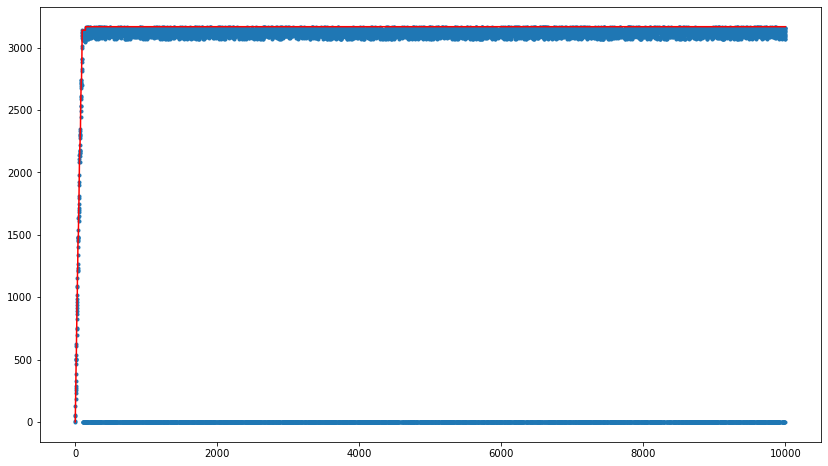

In [13]:
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')

In [ ]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < .4:
        index = np.random.randint(0, NUM_ITEMS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [15]:
solution = np.full(NUM_ITEMS, False)

history = [value(solution)]
last_improvement = None
for n in tqdm(range(1, 10_000+1)):
    new_solution = tweak(solution)
    history.append(value(new_solution))
    if value(new_solution) > value(solution):
        #logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
        last_improvement = n
        solution = new_solution
print(f"Finl value: {value(solution):,} -- last improvement: {last_improvement:,}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Finl value: 4,001 -- last improvement: 4,911


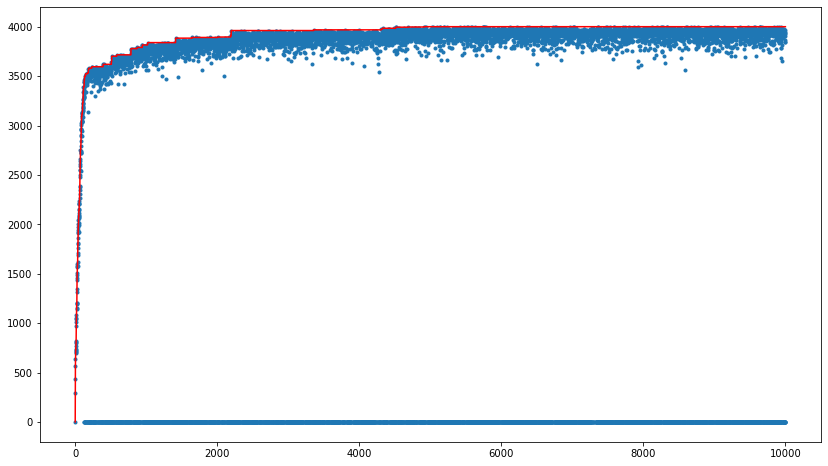

In [16]:
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')